In [ ]:
#Name: Afnan Mohammad Hafiz
#ID: 23241004
#Section: 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

## **Question 01 [3 + 1.5 + 1.5 = 6] Marks**


The general form of $n$ degree Lagrange polynomial is given by

$$p_n(x) = \sum_{k=0}^n f(x_k)̧\cdot l_k(x) = \sum_{k=0}^n y_k\cdot l_k(x)$$

where

$$l_k(x) = \prod_{j=0, j\neq k}^n \frac{x-x_j}{x_k-x_j}$$

Now, you need to find a polynomial using Lagrange interpolation method, which approximaets $\sin(x)$ at points $x=-\pi/4, 0, \pi/2$

**Tasks:**

a) Using the `Polynomial` class from the NumPy library, construct the Lagrange basis polynomials $l_0(x), l_1(x)$ and $l_2(x)$ and print them.

b) Use the previously constructed basis polynomials to find the interpolated polynomial $p_n(x)$, and print it.

c) Evaluate the polynomial $p_n(x)$ at $x=\pi/3$ and print the result.

In [ ]:
#Hint: np.sin(x) gives you the value of sin() for any valid input x
#a
def l(k,x):
  l_k=1.0
  for j in range(len(x)):
    if j==k:
      continue
    else:
      x_j=x[j]
      x_k=x[k]
      l_k *= ((x-x_j)/x_k-x_j)
  return (l_k)
print(l(k,x))
#b
def get_poly(k,x):
  f=None
  for i in range(len(x)):
    for j in range(len(x)):
      f+=((x[j]*k)*l(k,x))
  return f

print(get_poly(k,x))


#c
x_arr=[-(np.pi)/4,0,(np.pi)/2]
x=(np.pi)/3
p=Polynomial(x_arr)
for i in range(len(x_arr)):
  print(p(x))

NameError: name 'k' is not defined

# **Question: 02 [3 + 3 = 6] Marks**
Your phone has been losing charge far faster this week than last. You open its hidden system log and find only these four lines that mention screen-on time and the resulting battery drop:

```
1.0 hour screen-on time → 17 % lost  
3.5 hour screen-on time → 50 % lost  
4.0 hour screen-on time → 85 % lost
```
Later, a single extra line is appended:
```
5.0 hour screen-on time → 90 % lost
```
The log viewer refuses to draw a graph and the official battery-health tool is locked behind a server that is currently down.

All you have is the raw numbers and a sticky note on your desk that says:
<br></br>
<b><i>“Three (or more) exact readings → one unique predictive curve.”</i></b>
<br></br>
You want to know how much battery you would lose if you binge-scroll for **3.8** hours straight tonight.

a) Print the newton's basis for the polynomial constructed with the first three data points.
<br></br>
b) Now, write a function that adds new data to the previous data.
<br></br>
**[You are not allowed to hard code]**

In [ ]:
def calc_diff_matrix(x, y):
  n_nodes = len(x)
  coef = np.zeros((n_nodes,n_nodes))
  coef[:,0] = y
  for j in range(1,n_nodes):
    for i in range(n_nodes-j):
      coef[i][j] = ((coef[i+1][j-1]-coef[i][j-1])/(x[i+j]-x[i]))

  return coef

x = [1, 3.5, 4]
y = [17, 50, 85]

Matrix = calc_diff_matrix(x,y)
print(Matrix)

[[17.         13.2        18.93333333]
 [50.         70.          0.        ]
 [85.          0.          0.        ]]


In [ ]:
def add_new_node(Matrix, new_x, new_y, x_existing):
  x.append(new_x)
  return coef


new_x = 5.0
new_y = 99
Matrix_extended = add_new_node(Matrix, new_x, new_y, x)
print(Matrix_extended)

[2, 1, -6, -2, 2.5, 1]


# **Question: 03 [2 + 3 + 1.5 + 1.5 = 8] Marks**


Let $f(x)$ be a function of $x$.

$$f(x) = x^5 + 2.5x^4 - 2x^3 -6x^2 + x + 2\tag{1.1}$$

a. Plot the function for $$-2.5 \le x \le 1.5$$

b. What is the actual slope of $f(x)$ at $x = 0 , -1.18625$ ?  Print $f'(x)$ and plot $f'(x)$ at $ -2 \le x \le 1.2$.

For c to e, assume step size is $0.1$.

c. Use backward differntiation to figure out the slope at $x = 0 , -1.18625$.

d. Use central differntiation to figure out the slope at $x = 0 , -1.18625$.

3.1101078691430666
1.0 - 12.0·x - 6.0·x² + 10.0·x³ + 5.0·x⁴
1.5776000000000012 0.9801000000000015
-0.5476397529174859 0.002184565441896158


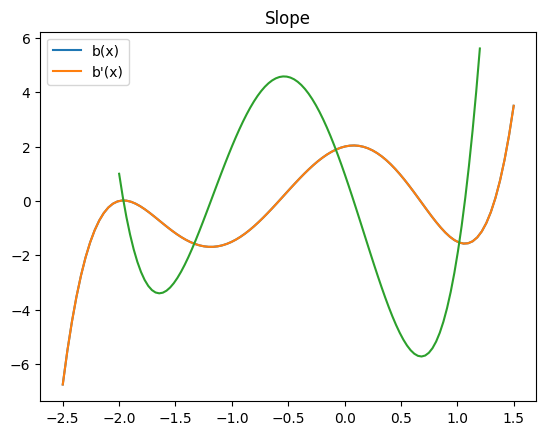

In [ ]:
#a
fig,ax= plt.subplots()
coef=[2,1,-6,-2,2.5,1]
p=Polynomial(coef)
x=np.linspace(-2.5,1.5,100)
x_arr= [0, -1.18625]
plt.plot(x,p(x))
ax.plot(x,p(x),label = 'B(x)')
plt.legend(["b(x)","b'(x)"],loc="upper left")
plt.title("Slope")

#b
slope = ((p(x_arr[1]) - p(x_arr[0]))/ x_arr[1]-x_arr[0])
print(slope)
p_prime = p.deriv(1)
print(p_prime)
x = np.linspace(-2,1.2,100)
ax.plot(x,p_prime(x), label = "B'(x)")

#cd
h= 0.1
for i in x_arr:
  backward =((p(i)-p(i-h))/h)
  central = ((p(i+h)-p(i-h))/(2*h))
  print(backward, central)